<a href="https://colab.research.google.com/github/scarfboy/wetsuite-dev/blob/main/examples/dataset_kansspelautoriteit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip --quiet install https://github.com/scarfboy/wetsuite-dev/archive/refs/heads/main.zip

In [ ]:
!python3 -m spacy download nl_core_news_md

In [ ]:
# used to get just the nouns out
import spacy
dutch = spacy.load('nl_core_news_md')

In [ ]:
import wetsuite.datasets

ks = wetsuite.datasets.load('kansspelautoriteit')
print( ks.description )

# What does the data look like?

Pages of plain text, mainly.

CASE: Toto Online B.V.
  01_278_071_15091_sanctiebesluit_toto_ov.pdf
  01_278_082_ov_openbaarmakingsbesluit_woo_15091.pdf
  2204 words


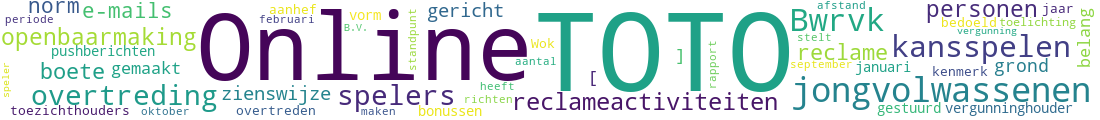

--------------------------------------------------------------------------------
CASE: Nationale Posctode Loterij N.V.
  sanctiebesluit_npl.pdf
  openbaarmakingsbesluit_npl.pdf
  2344 words


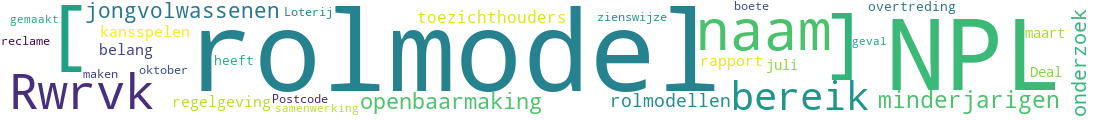

--------------------------------------------------------------------------------
CASE: M.K.C Limited
  20220823_01_265_505_-_besluit_last_onder_dwangsom_ov.pdf
  20220823_01_265_507_-_besluit_openbaarmaking_ov.pdf
  1589 words


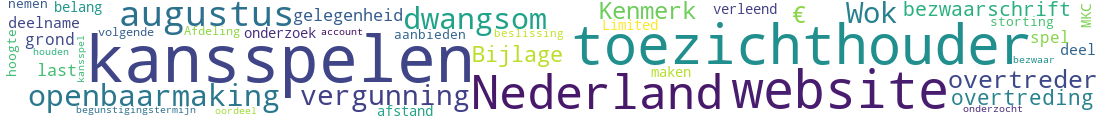

--------------------------------------------------------------------------------
CASE: L.C.S Limited
  20220817_01_265_500_-_besluit_lod_sons-of-slots_ov.pdf
  20220817_01_265_499_-_besluit_openbaarmaking_ov.pdf
  1590 words


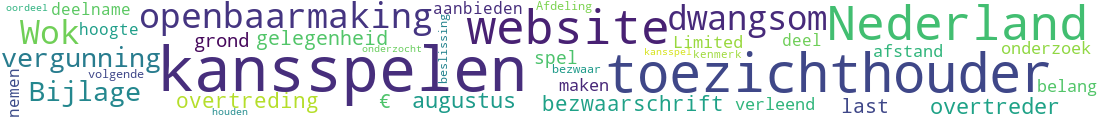

--------------------------------------------------------------------------------
CASE: Gammix Limited
  20220707_01_270_078_-_lod_gammix_ov.pdf
  20220707_01_270_081_-_besluit_openbaarmaking_gammix_ov.pdf
  2029 words


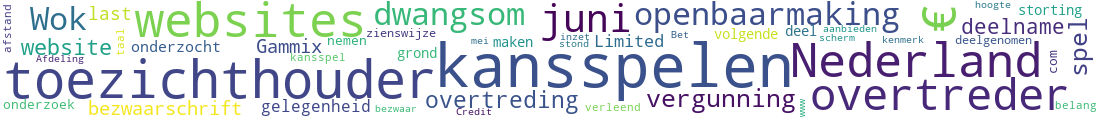

--------------------------------------------------------------------------------


Total number of   cases:5  documents:10   pages:89   text fragments:750   words:0


In [8]:
import textwrap, random, re
from IPython.core.display import HTML
import wetsuite.helpers.string
import wetsuite.helpers.format
import wetsuite.extras.word_cloud

def show_wordcloud(words):
    counts = wetsuite.extras.word_cloud.count_case_insensitive( words )
    for remove in 'Kansspelautoriteit artikel lid Wet raad bestuur besluit'.split():
        if remove in counts:
            counts.pop( remove )
    im = wetsuite.extras.word_cloud.wordcloud_from_freqs( counts, 1100, 120 )
    display( im )


num_cases, num_docs, num_pages, num_pars, num_words = 0, 0, 0, 0, 0

cases = ks.data
for case in cases[:5]: # show the first few
    print( 'CASE: %s'%case['name'] )
    words = []
    num_cases += 1
    for doc in case['docs']:
        print( '  %s'%wetsuite.helpers.format.url_basename(doc['url']) )
        num_docs += 1
        for page in doc['pages']:
            num_pages += 1
            for par in page['body_text']:
                num_pars += 1
                parsed = dutch(par)
                for token in parsed:
                    if token.pos_ in ('NOUN','PROPN', 'VERB'):
                        words.append( token.text )

    print( '  %d words'%(len(words))  )
    show_wordcloud( words )
    print('-'*80)


print( '\n\nTotal number of   cases:%d  documents:%d   pages:%d   text fragments:%d   words:%d'%( num_cases, num_docs, num_pages, num_pars, num_words) )



